In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as yy
from matplotlib import dates as pm
import numpy as np
yy.use("ggplot")

In [194]:
data2020=pd.read_csv("weather.csv")
datadec=pd.read_csv("weatherDec2019.csv")

In [195]:
four_seasons=pd.merge(datadec,data2020,how="outer")

In [196]:
begin=pd.to_datetime("2019-12-22")
end=pd.to_datetime("2020-12-21")

In [197]:
four_seasons

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility,Unnamed: 8
0,1-Dec-2019,00:00,13,6.00,↑,59,1018,5.00,NaN
1,1-Dec-2019,01:00,13,7.00,↑,59,1018,5.00,NaN
2,1-Dec-2019,02:00,13,0.00,↑,63,1017,5.00,NaN
3,1-Dec-2019,03:00,12,7.00,↑,67,1017,5.00,NaN
4,1-Dec-2019,04:00,12,13.00,↑,67,1017,5.00,NaN
...,...,...,...,...,...,...,...,...,...
9413,31-Dec-2020,19:00,12,6.00,↑,77,1018,6.00,NaN
9414,31-Dec-2020,20:00,11,0.00,↑,77,1018,6.00,NaN
9415,31-Dec-2020,21:00,11,0.00,↑,77,1019,6.00,NaN
9416,31-Dec-2020,22:00,10,6.00,↑,82,1019,6.00,NaN


In [198]:
four_seasons.date=pd.to_datetime(four_seasons.date)

In [199]:
four_seasons=four_seasons.loc[(four_seasons.date<=end) & (four_seasons.date>= begin),
~four_seasons.columns.isin(["Unnamed: 8" ,"wdirection"]) ]

In [200]:
four_seasons

,date,time,temp,wspeed,humidity,pressure,visibility
519,2019-12-22,00:00,7,0.00,61,1023,4.00
520,2019-12-22,01:00,6,0.00,71,1022,4.00
521,2019-12-22,02:00,6,0.00,57,1022,5.00
522,2019-12-22,03:00,6,0.00,61,1022,5.00
523,2019-12-22,04:00,6,0.00,66,1022,5.00
...,...,...,...,...,...,...,...
9172,2020-12-21,19:00,15,7.00,51,1021,6.00
9173,2020-12-21,20:00,14,17.00,51,1022,6.00
9174,2020-12-21,21:00,14,11.00,55,1022,6.00
9175,2020-12-21,22:00,14,9.00,55,1022,6.00


In [201]:
four_seasons=four_seasons[four_seasons.time.str.contains(r":00")]

In [202]:
gro=four_seasons.groupby("date").count()
gro[gro.time<=24].count()

time          366
temp          366
wspeed        366
humidity      366
pressure      366
visibility    366
dtype: int64

In [203]:
four_seasons.isnull().sum()

date            0
time            0
temp            0
wspeed         10
humidity        0
pressure        0
visibility    242
dtype: int64

In [204]:
four_seasons[four_seasons.wspeed.isnull()]

,date,time,temp,wspeed,humidity,pressure,visibility
1303,2020-01-22,19:00,6,NaN,81,1021,5.00
3626,2020-04-28,07:00,12,NaN,62,1012,5.00
3628,2020-04-28,09:00,17,NaN,42,1013,6.00
3629,2020-04-28,10:00,19,NaN,40,1013,6.00
3642,2020-04-28,23:00,16,NaN,55,1012,8.00
3643,2020-04-29,00:00,15,NaN,59,1012,8.00
3645,2020-04-29,05:00,12,NaN,82,1012,8.00
3663,2020-04-30,12:00,22,NaN,29,1015,7.00
5910,2020-08-04,22:00,25,NaN,47,1010,7.00
7310,2020-10-03,20:00,22,NaN,61,1017,5.00


In [205]:
four_seasons=four_seasons.ffill()

In [206]:
four_seasons.isnull().sum()

date          0
time          0
temp          0
wspeed        0
humidity      0
pressure      0
visibility    0
dtype: int64

In [207]:
pd.options.display.float_format="{:.2f}".format
four_seasons.describe()

,temp,wspeed,humidity,pressure,visibility
count,8492.00,8492.00,8492.00,8492.00,8492.00
mean,19.01,10.03,54.66,1015.10,6.60
std,8.68,8.81,24.10,4.39,3.36
min,0.00,0.00,3.00,1000.00,0.00
25%,11.00,0.00,35.00,1012.00,5.00
50%,19.00,9.00,54.00,1015.00,6.00
75%,26.00,15.00,76.00,1018.00,7.00
max,42.00,74.00,100.00,1030.00,16.00


In [208]:
jan=four_seasons[four_seasons.date.dt.month==1]

In [209]:
result=(jan.pivot_table(index="time",columns=jan.date.dt.date,values="temp")).fillna(method="bfill")
result

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31
time,,,,,,,,,,,,,,,,,,,,,
00:00,5.00,7.00,8.00,7.00,7.00,7.00,8.00,7.00,6.00,6.00,...,5.00,5.00,7.00,2.00,3.00,5.00,6.00,8.00,8.00,8.00
01:00,5.00,7.00,8.00,7.00,7.00,6.00,7.00,6.00,7.00,6.00,...,4.00,5.00,7.00,2.00,2.00,4.00,7.00,8.00,7.00,7.00
02:00,5.00,7.00,7.00,6.00,7.00,6.00,7.00,6.00,6.00,6.00,...,4.00,5.00,7.00,3.00,2.00,3.00,6.00,8.00,7.00,9.00
03:00,5.00,6.00,7.00,6.00,7.00,5.00,6.00,6.00,6.00,6.00,...,4.00,5.00,7.00,2.00,2.00,3.00,5.00,8.00,7.00,9.00
04:00,4.00,6.00,7.00,6.00,7.00,4.00,6.00,6.00,5.00,6.00,...,4.00,4.00,7.00,3.00,2.00,3.00,5.00,8.00,7.00,8.00
05:00,4.00,6.00,8.00,5.00,7.00,4.00,6.00,6.00,6.00,5.00,...,4.00,4.00,7.00,2.00,2.00,2.00,5.00,8.00,6.00,8.00
06:00,5.00,6.00,8.00,5.00,7.00,4.00,6.00,6.00,5.00,5.00,...,4.00,5.00,7.00,2.00,2.00,2.00,4.00,8.00,6.00,8.00
07:00,6.00,5.00,8.00,6.00,6.00,4.00,6.00,6.00,5.00,6.00,...,4.00,5.00,6.00,2.00,2.00,2.00,4.00,8.00,5.00,8.00
08:00,6.00,6.00,7.00,4.00,7.00,4.00,6.00,6.00,5.00,5.00,...,4.00,5.00,5.00,3.00,3.00,3.00,4.00,8.00,7.00,8.00


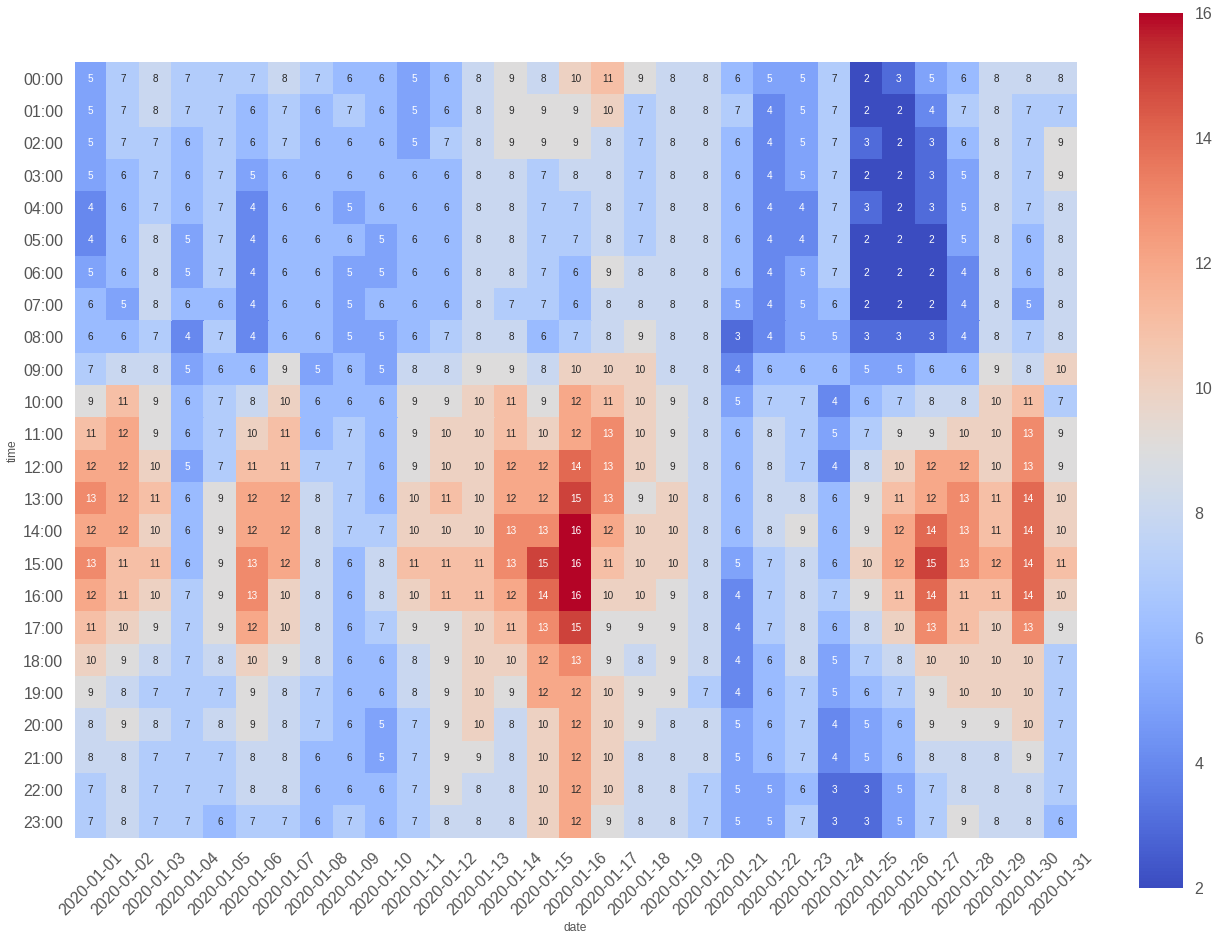

In [210]:
fig,ax=plt.subplots(figsize=(20,15))
x=sns.heatmap(result,annot=True,square=True,cmap="coolwarm",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()

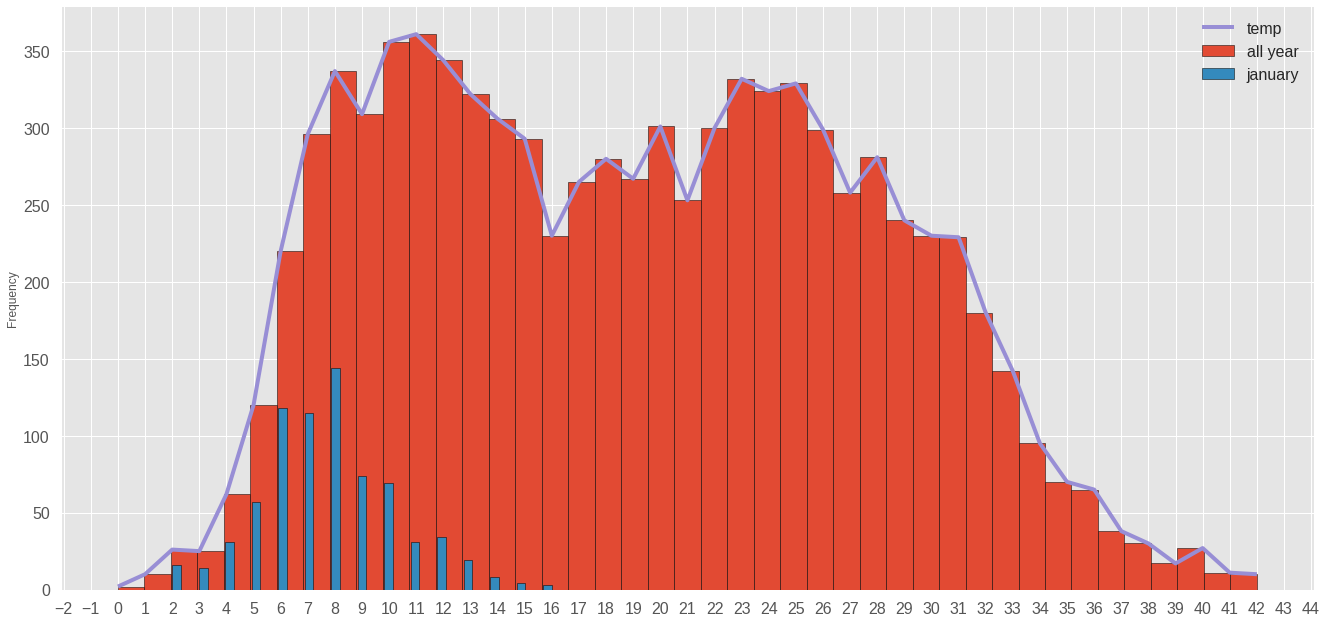

In [211]:
four_seasons.temp.plot.hist(bins=43,figsize=(20,15),edgecolor="black",label="all year")
jan.temp.plot.hist(bins=43,figsize=(20,10),edgecolor="black",label="january")
plt.xticks(range(-3,50))
four_seasons.temp.value_counts().sort_index().plot(figsize=(20,10))
plt.legend()

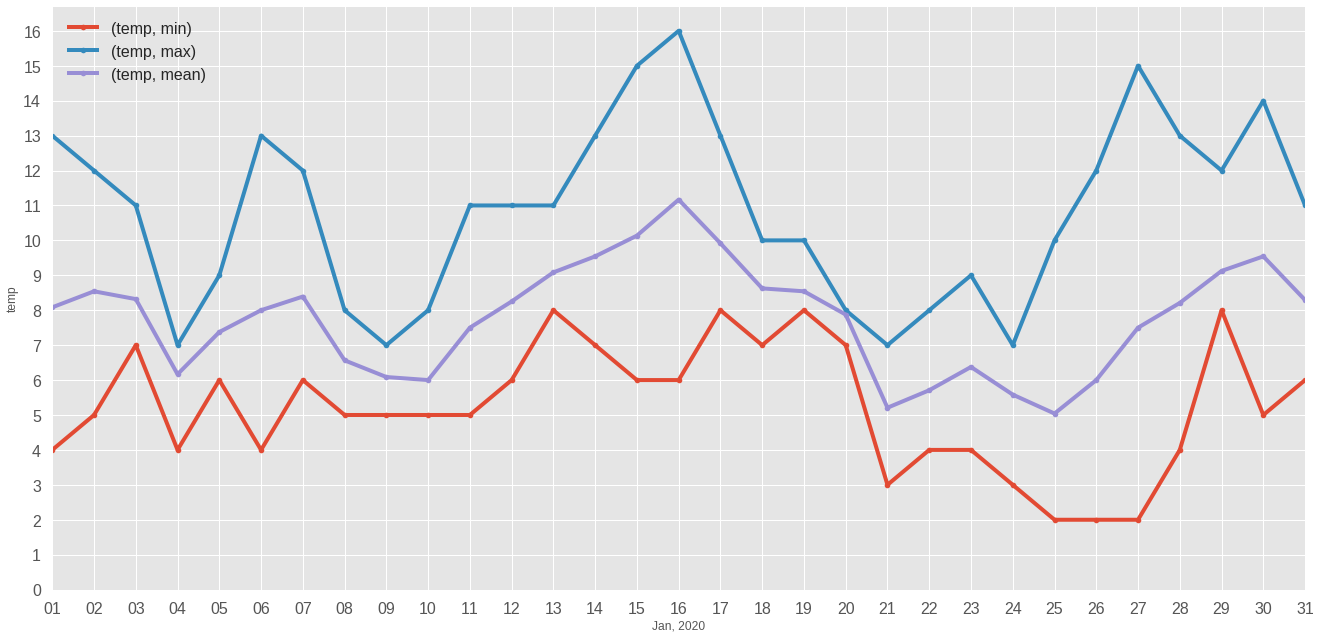

In [212]:
jan.groupby("date").agg({"temp":["min","max","mean"]}).plot(figsize=(20,10),marker=".")
plt.xticks(pd.date_range(start=("2020-1-1"),end=("2020-1-31")))
dataf=pm.DateFormatter("%d")
plt.gca().xaxis.set_major_formatter(dataf)
plt.yticks(range(17))
plt.xlabel("Jan, 2020")
plt.ylabel("temp")
plt.legend()

<AxesSubplot:>

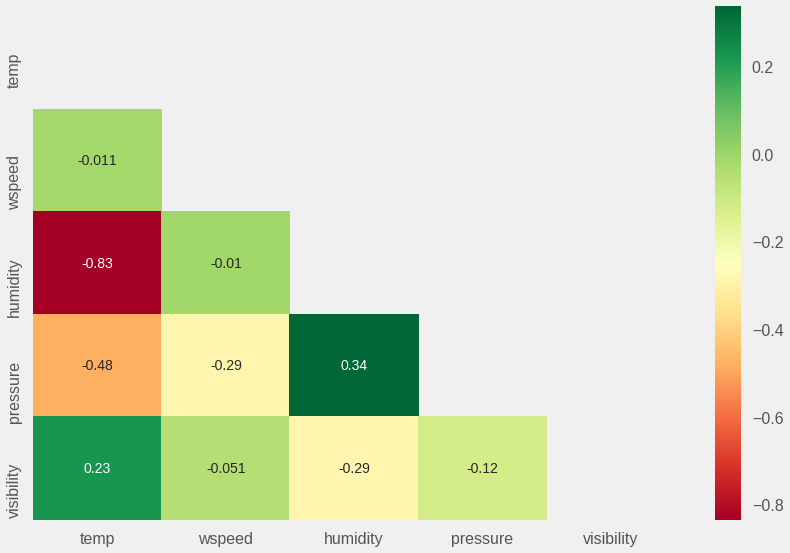

In [213]:
# yy.use("seaborn-ticks")
yy.use("fivethirtyeight")
correlation=four_seasons.corr()
upper=np.triu(correlation)
sns.heatmap(correlation,annot=True,cmap="RdYlGn",mask=upper)

In [214]:
four_seasons.pressure=four_seasons.pressure-1000

<AxesSubplot:xlabel='date'>

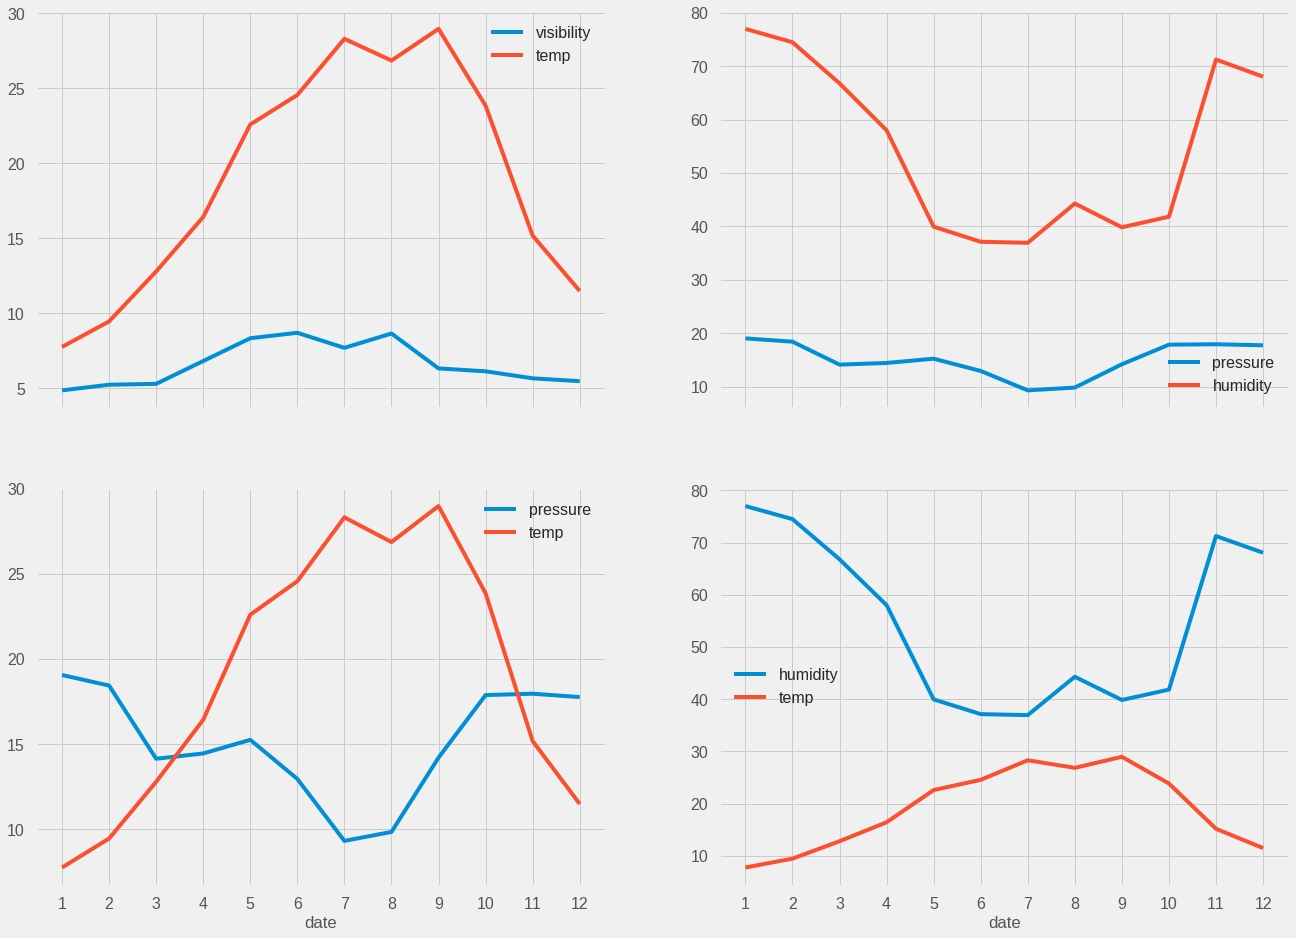

In [231]:
# yy.use("tableau-colorblind10")
fig, axes= plt.subplots(2,2,sharex=True,figsize=(20,15))
plt.xticks(range(0,13))
group=four_seasons.groupby(four_seasons.date.dt.month).mean()
group[["visibility","temp"]].plot(ax=axes[0,0])
group[["pressure","humidity"]].plot(ax=axes[0,1])
group[["pressure","temp"]].plot(ax=axes[1,0])
group[["humidity","temp"]].plot(ax=axes[1,1])

set global variables instead of redundancy

<AxesSubplot:title={'center':'Fall'}, xlabel='date'>

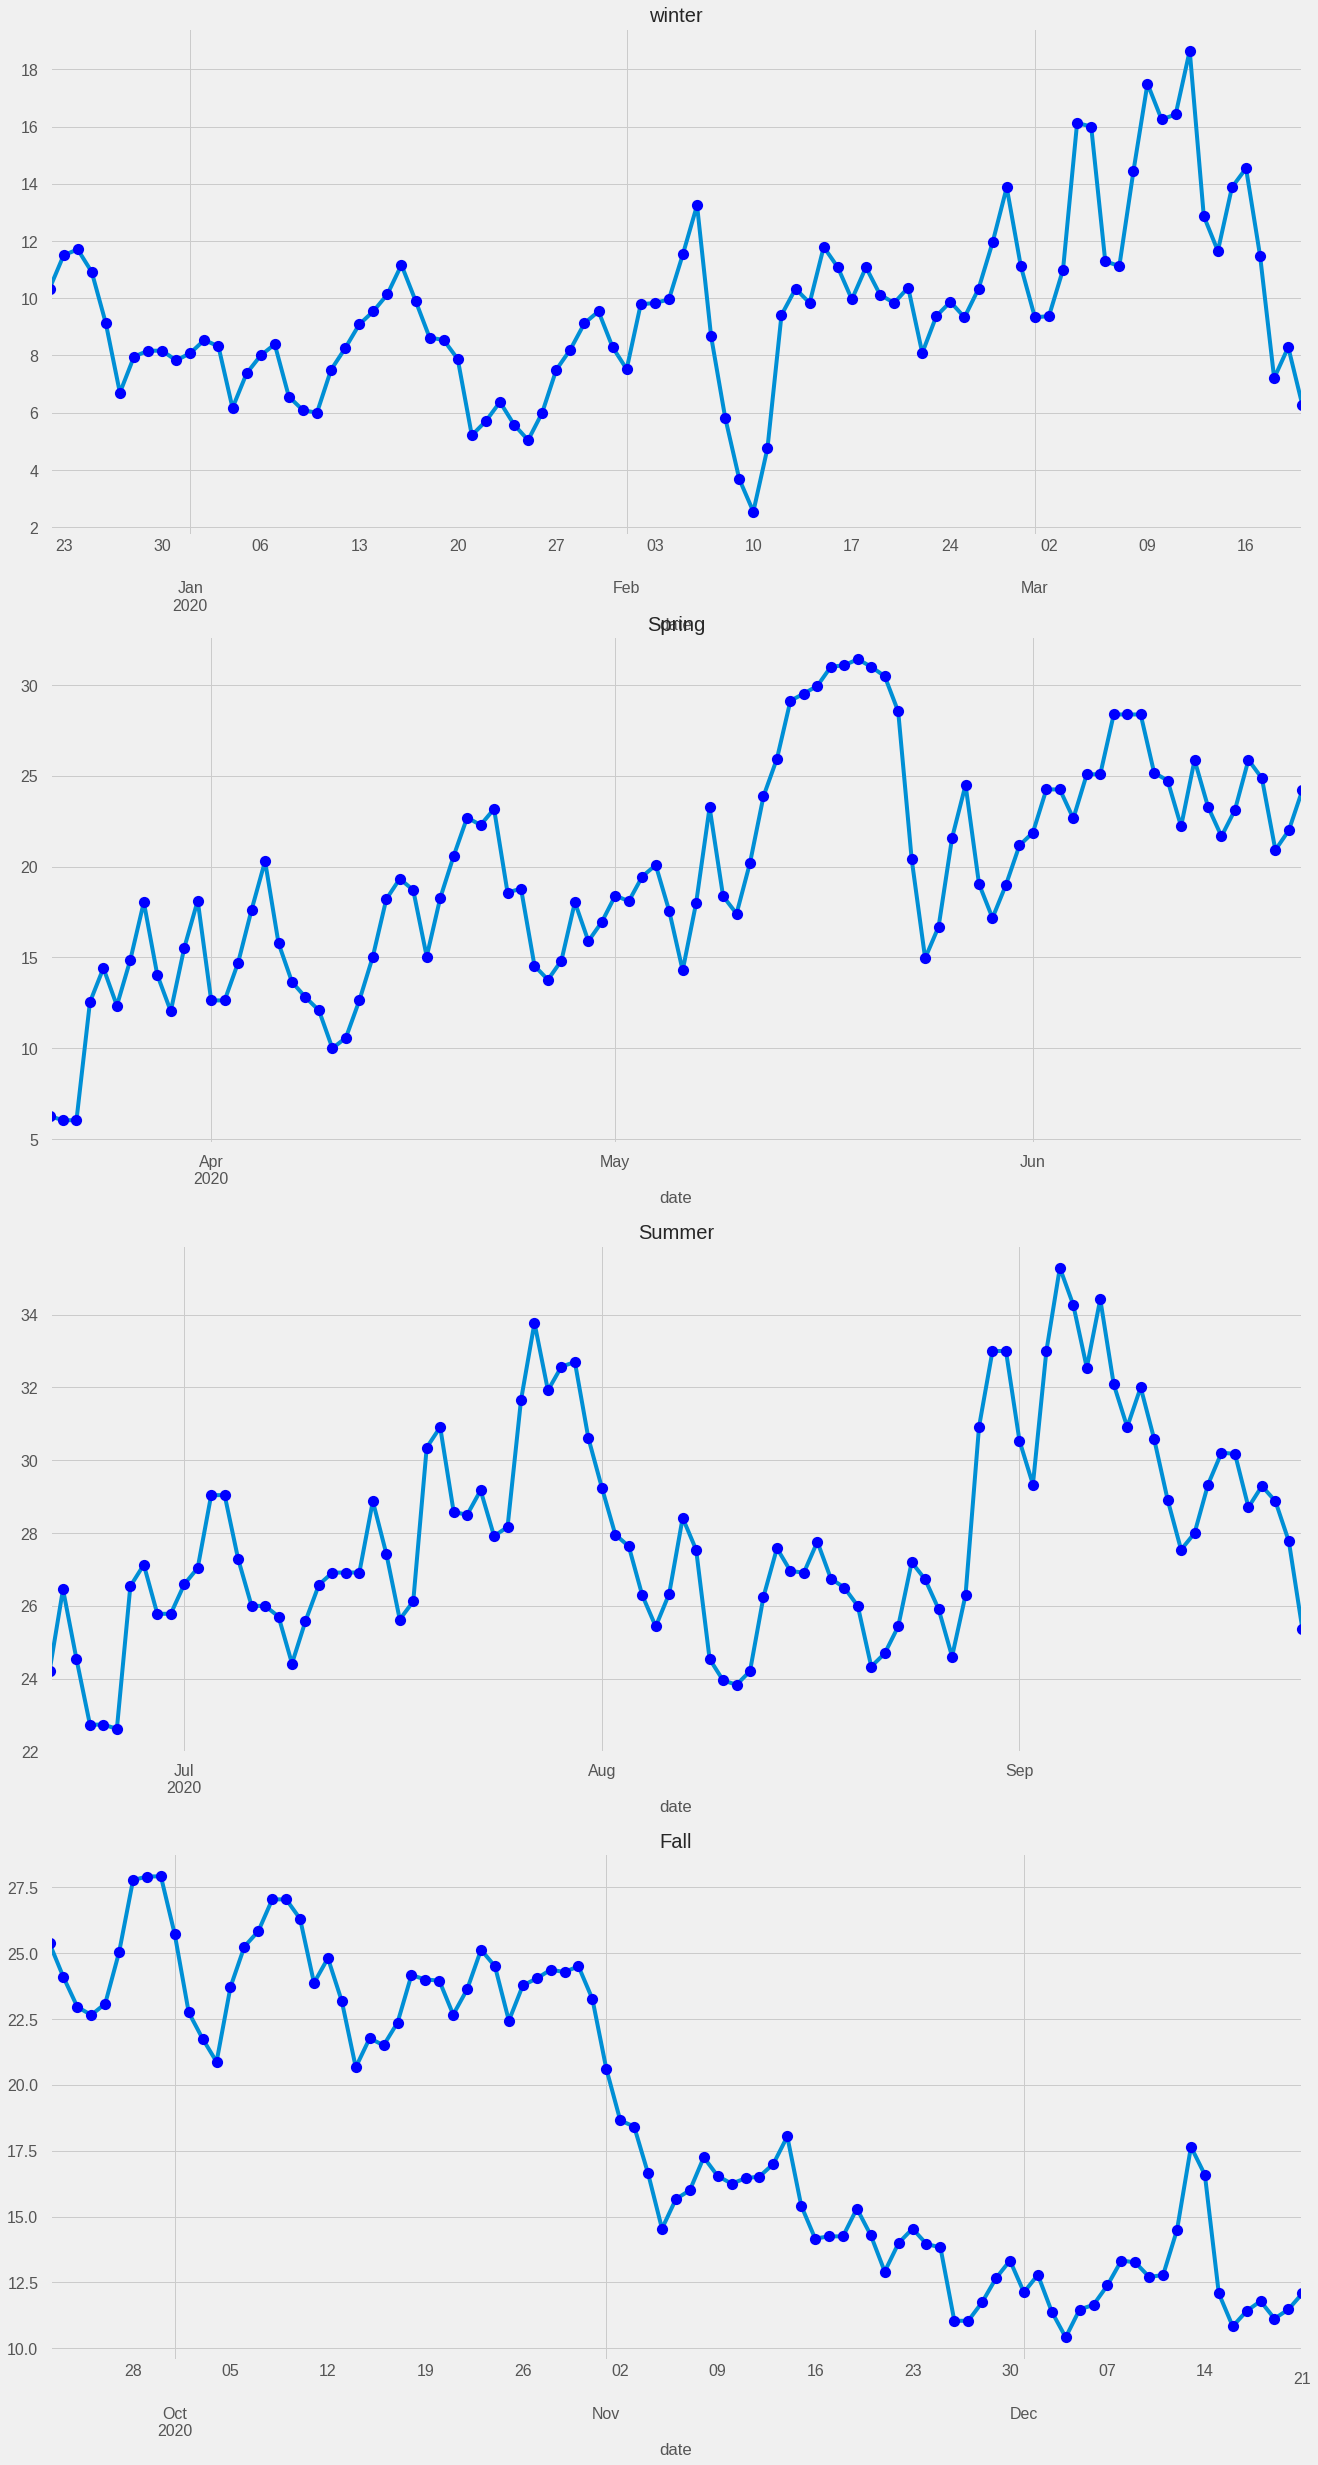

In [285]:
fig, axes= plt.subplots(4,1,figsize=(20,40))
# four_seasons.loc[(four_seasons.date<=end) & (four_seasons.date>= begin)
temp_s=four_seasons.groupby(four_seasons.date)["temp"].mean()

temp_s[temp_s.index<"2020-3-21"].plot(ax=axes[0],marker="o",markerfacecolor="b",title="winter")
temp_s[(temp_s.index>="2020-3-20") & (temp_s.index<="2020-6-21")].plot(ax=axes[1],marker="o",markerfacecolor="b",title="Spring")
temp_s[(temp_s.index<="2020-9-22")&(temp_s.index>="2020-6-21")].plot(ax=axes[2],marker="o",markerfacecolor="b",title="Summer")
temp_s[temp_s.index>="2020-9-22"].plot(ax=axes[3],marker="o",markerfacecolor="b",title="Fall")

In [287]:
winter=four_seasons[four_seasons.date.dt.date<=pd.to_datetime("2020-3-20")]

/home/roy/.local/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


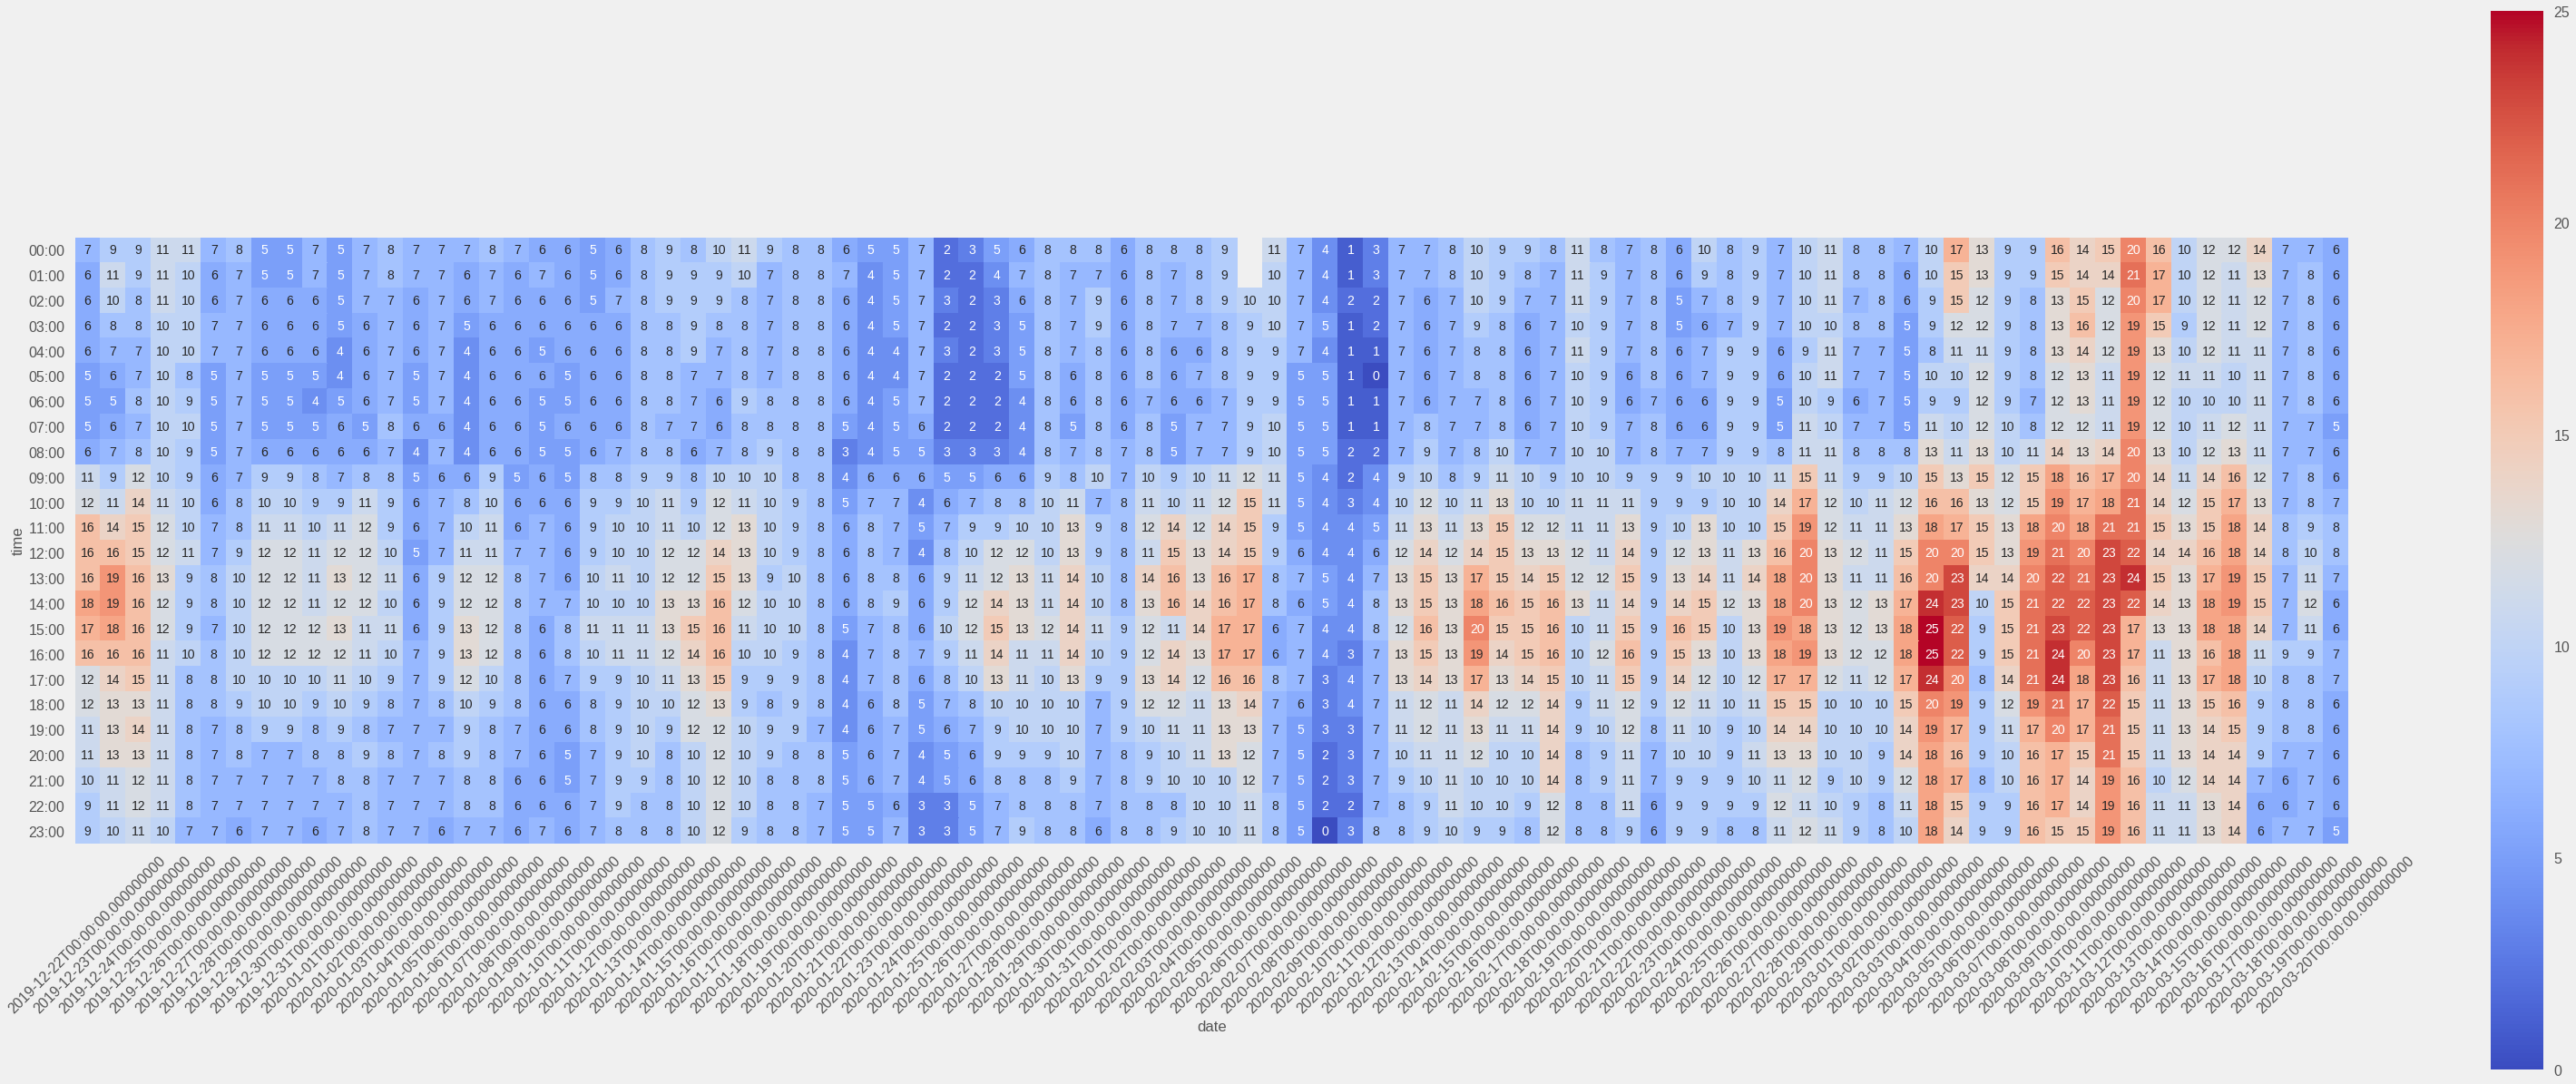

In [290]:
pivot_i=(winter.pivot_table(index="time",columns=winter.date,values="temp"))
# # fill missing values
pivot_i.fillna(method="ffill",inplace=True)
fig,ax=plt.subplots(figsize=(50,20))
x=sns.heatmap(pivot_i,annot=True,square=True,cmap="coolwarm",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()